In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotting
import pickle
from nest import raster_plot
import numpy as np
import os
from scipy.signal import argrelextrema
import pylab
from importlib import reload # reload modules
reload(plotting)
# import warnings
# warnings.filterwarnings('ignore')

<module 'plotting' from '/home/adrossel/Magic/pickle/plotting.py'>

In [2]:
def files(path):  
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file
def files_start_with(start, path='.'):
    list_of_files = []
    for file in files(path):  
        if file.startswith(start):
            list_of_files.append(file)
    return sorted(list_of_files)
def parse_filename(file):
    return file.replace('.p','').split('_')

In [143]:
from jupyterthemes import jtplot
jtplot.style()
jtplot.style('default')

In [4]:
# Templating for latex code with Jinja2
from jinja2 import Template

In [5]:
# formatted latex string for figures
latex_header = r"""
    \documentclass[a4paper,12pt]{article}

    \usepackage[english]{babel}
    \usepackage{graphicx}
    \usepackage{subcaption}
    
    \usepackage{siunitx}

    \begin{document}
"""
latex_footer = r"\end{document}"
figure_template = Template(
    r"""
    \begin{figure}
    \centering
        \includegraphics[width={{ width }}\textwidth]{ {{figure}} }
        \caption{ {{ caption }} }
    \end{figure}
    """)
double_figure_latex_template = Template(
    r"""
\begin{figure}
    \centering
    \begin{subfigure}[b]{0.49\textwidth}
        \includegraphics[width=\textwidth]{ {{fig1}} }
        \caption{ {{cap1}} }
        \label{fig:gull}
    \end{subfigure}
    \begin{subfigure}[b]{0.49\textwidth}
        \includegraphics[width=\textwidth]{ {{fig2}} }
        \caption{ {{cap2}} }
        \label{fig:tiger}
    \end{subfigure}
    \caption{ {{cap_main}} }
    \label{fig:animals}
\end{figure}
    """)

In [6]:
def dynamics_and_raster_plot(folder, save=True, latex=False):
    state_folder = ''
    params = pickle.load(open(folder+'/parameter.pickle', 'rb'))
    df_ex = pickle.load(open(folder+'/df_ex.pickle', 'rb'))
    df_in = pickle.load(open(folder+'/df_in.pickle', 'rb'))
    fig = plotting.visualisation_both(df_ex, df_in)
    if save: 
        fig_path_visu = folder+'_visu.pdf'
        fig.savefig(fig_path_visu, format='pdf')
    df_ex_data = np.array(df_ex[['Sender', 'Time']].values.tolist())
    df_ex_data = np.array([[n_id, time] for n_id,time in df_ex_data if n_id < 1602 and
                          n_id > 2])
    raster = raster_plot.from_data(df_ex_data, title=r'Excitatory Population', rasterized=True)
    if save: 
        fig_path_raster_exc = folder+state_folder+'_exc_raster.pdf'       
        plt.savefig(fig_path_raster_exc, format='pdf')
    plt.show()
    plotting.autocorr(df_ex)
    if save:
        fig_path_autocorr_exc = folder+state_folder+'_exc_autocorr.pdf'       
        plt.savefig(fig_path_autocorr_exc, format='pdf')
    plt.show()
    periods = plotting.period(df_in)
    var = plotting.variance(df_in)
    df_in_data = np.array(df_in[['Sender', 'Time']].values.tolist())
    df_in_data = np.array([[n_id, time] for n_id,time in df_in_data if n_id > 25602 and
                        n_id < 27202])
    raster = raster_plot.from_data(df_in_data, title=r'Inhibitory Population', rasterized=True)
    if save: 
        fig_path_raster_inh = folder+state_folder+'_inh_raster.pdf'       
        plt.savefig(fig_path_raster_inh, format='pdf')
    plt.show()
    plotting.autocorr(df_in)
    if save:
        fig_path_autocorr_inh = folder+state_folder+'_inh_autocorr.pdf'       
        plt.savefig(fig_path_autocorr_inh, format='pdf')
    if latex:
        global visu_latex_string
        visu_latex_string += figure_template.render(figure=fig_path_visu,
                             caption=r"""
                             Time resolution for excitatory and inhibitorypopulation with 
                             $\nu_{exc,ext} = %.2f \,\si{Hz}$ and $\nu_{inh,ext} = %.2f \,\si{Hz}$.
                             """ % (params['Background rate excitatory'],
                                   params['Background rate inhibitory'], ),
                             width=1.0)
        global raster_autocorr_latex_string
        raster_autocorr_latex_string += double_figure_latex_template.render(fig1=fig_path_raster_exc,
                             cap1='Excitatory population',
                             fig2=fig_path_raster_inh,
                             cap2='Inhibitory population',
                             cap_main=r"""Raster plots with 
                             $\nu_{exc,ext} = %.2f \,\si{Hz}$ and $\nu_{inh,ext} = %.2f \,\si{Hz}$.
                             """ % (params['Background rate excitatory'],
                                   params['Background rate inhibitory'], ),
                             width=0.7)
        raster_autocorr_latex_string += double_figure_latex_template.render(
            fig1=fig_path_autocorr_exc,
            cap1='Excitatory population',
            fig2=fig_path_autocorr_inh,
            cap2='Inhibitory population',
            cap_main=r"""Autocorrelation Plot for average firing rate of 
                excitatory population with h 
                $\nu_{exc,ext} = %.2f \,\si{Hz}$ and $\nu_{inh,ext} = %.2f \,\si{Hz}$.
                """ % (params['Background rate excitatory'],
                        params['Background rate inhibitory'], ),
            width=0.7)

In [7]:
base_folder = 'phase_plane_analysis/new_small'
folders = [f[0] for f in os.walk(base_folder)]
folders.sort()
folders

['phase_plane_analysis/new_small',
 'phase_plane_analysis/new_small/e0_15_i0_00',
 'phase_plane_analysis/new_small/e0_15_i0_03',
 'phase_plane_analysis/new_small/e0_15_i0_06',
 'phase_plane_analysis/new_small/e0_15_i0_09',
 'phase_plane_analysis/new_small/e0_15_i0_12',
 'phase_plane_analysis/new_small/e0_15_i0_15',
 'phase_plane_analysis/new_small/e0_15_i0_21',
 'phase_plane_analysis/new_small/periodicity',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_00',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_01',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_02',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_03',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_04',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_05',
 'phase_plane_analysis/new_small/periodicity/e0_15_i0_06',
 'phase_plane_analysis/new_small/stimulus']

In [8]:
with open(base_folder+'/parameter.p', 'rb') as f:
    params = pickle.load(f)
plotting.printParams(folders[0])

Name : tsodyks
Columns : 40
Rows : 40
Radius excitational : 0.2
Sigma excitational : 0.1
Radius inhibitory : 0.2
Sigma inhibitory : 0.1
Jee : 3.0
Jii : 1.0
Jei : 3.0
Jie : -12.0
Background weight : 30.0
Jee Connectivity : 0.4
Jii Connectivity : 0.4
Jei Connectivity : 0.4
Jie Connectivity : 0.4
Number excitational cells : 16
Number inhibitory cells : 4
Weight Stimulus : 0.0
Radius stimulus : 0.1
Sigma Stimulus : 0.05
e2e delay : 1.0
e2i delay : 1.0
i2e delay : 1.0
i2i delay : 1.0
delay growth multiplier : 2
Stimulus rate : 40000.0
Background rate excitatory : 2500.0
Background rate inhibitory : 1500.0
Time before stimulation : 300.0
Time of stimulation : 0.0
Time after Stimulation : 300.0


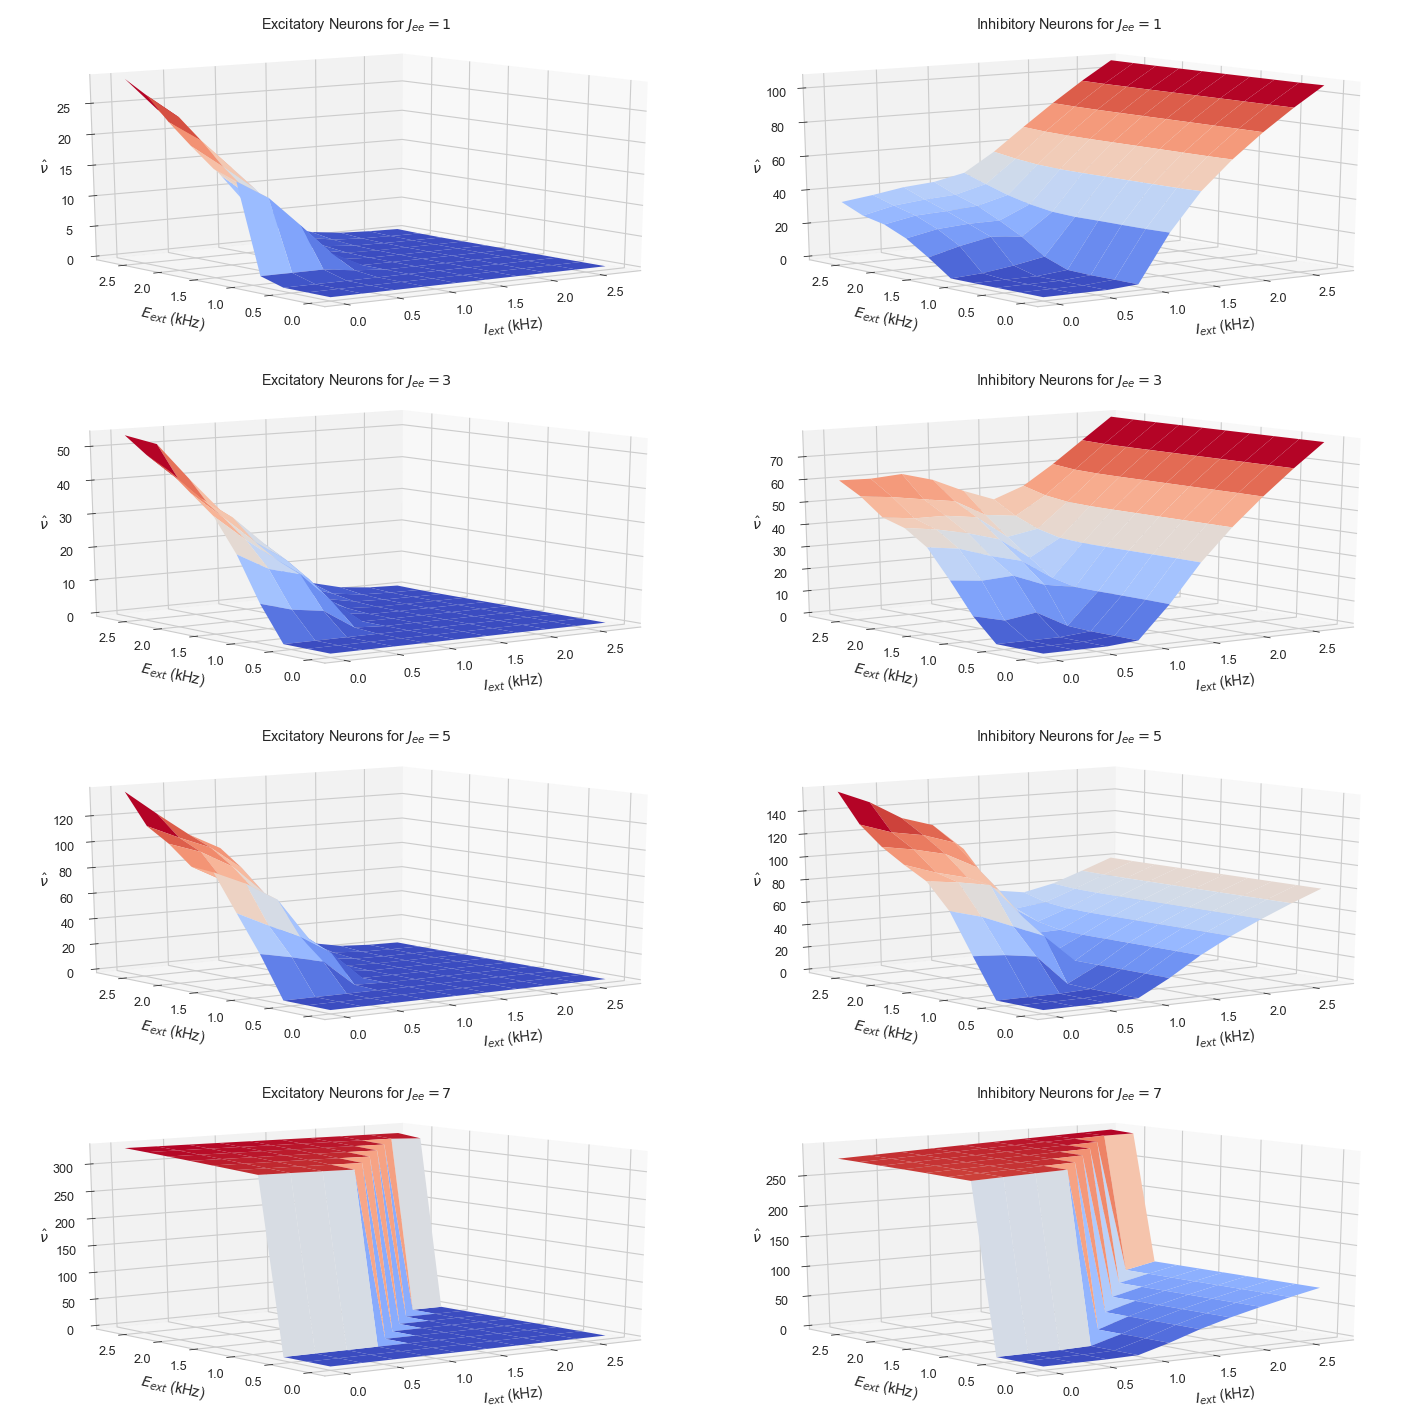

In [9]:
fig = plotting.phase_plane_analysis(folders[0])
phase_plane_file = folders[0]+'/phase_plane.pdf'
fig.savefig(phase_plane_file)

# Testing phase plane analysis in one figure

In [10]:
phase_plane_latex_string = figure_template.render(figure=phase_plane_file,
                             caption="Phase Plane.",
                             width=0.9)

r$\nu_{exc, ext} = 1500.0$
r$\nu_{0, inh, ext} = 0.0$
r$\nu_{1, inh, ext} = 300.0$
r$\nu_{2, inh, ext} = 600.0$
r$\nu_{3, inh, ext} = 900.0$
r$\nu_{4, inh, ext} = 1200.0$
r$\nu_{5, inh, ext} = 1500.0$
r$\nu_{7, inh, ext} = 2100.0$


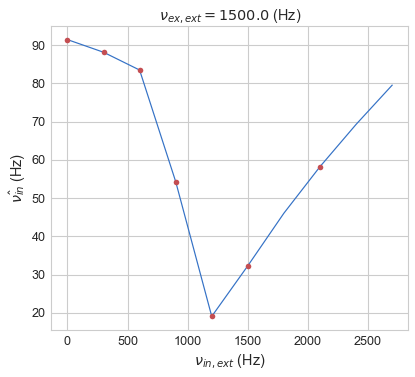

In [11]:
E, I = pickle.load( open(folders[0]+'/E_I.p', 'rb'))
with open(folders[0]+'/e_i_jee_5_0.p', 'rb') as file:
    e, i = pickle.load(file)
    plotting.plot_intersections([0,1,2,3,4,5,7], 5, e, i, E, I, file='intersection.pdf')
    phase_plane_latex_string += figure_template.render(figure='intersection.pdf',
                             caption=r"Intersection for $J_{ee} = 5.0$",
                             width=0.9)

Current Folder: phase_plane_analysis/new_small/e0_15_i0_00
$\hat{\nu_i} = 0.00$


KeyboardInterrupt: 

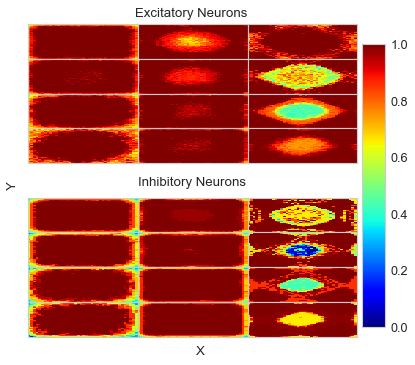

In [29]:
raster_autocorr_latex_string = ""
visu_latex_string = ""
for folder in folders[1:]:
    if not 'stimulus' in folder and not 'periodicity' in folder:
        print("Current Folder: %s" % (folder,))
        para = plotting.getParams(folder, pickle_file='/parameter.pickle')
        print(r'$\hat{\nu_i} = %4.2f$' % (para['Background rate inhibitory'],))
        dynamics_and_raster_plot(folder, save=True, latex=True)

In [10]:
phase_plane_latex_string = ""
for file in files:
    phase_plane_latex_string += figure_template.render(figure=file,
                             caption="Phase Plane.",
                             width=0.9)

<Figure size 460.8x403.2 with 0 Axes>

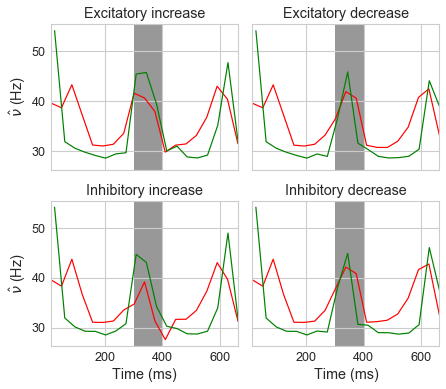

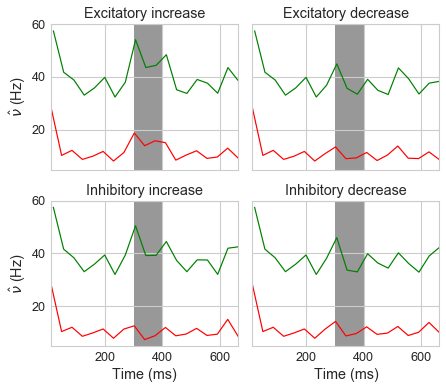

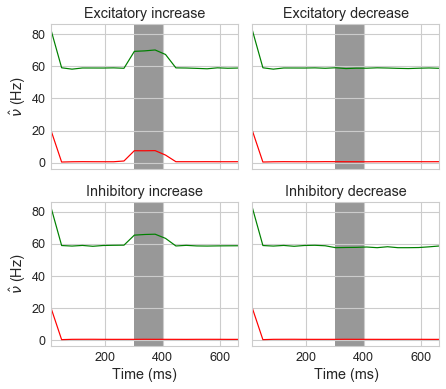

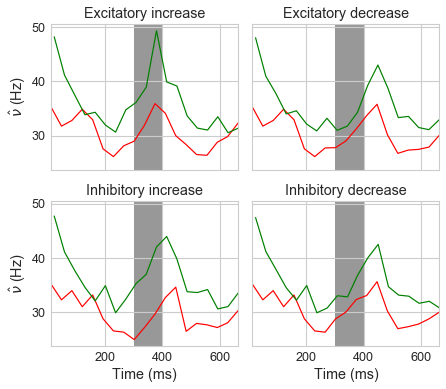

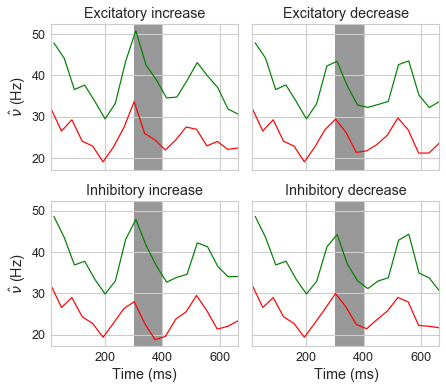

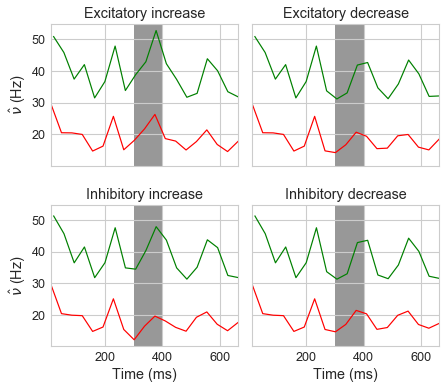

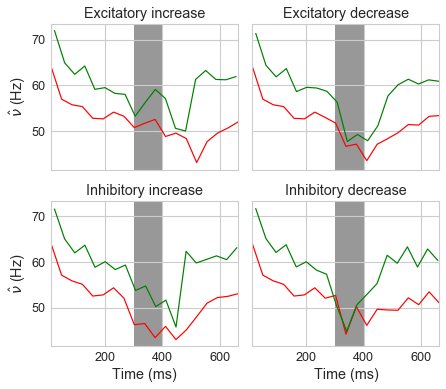

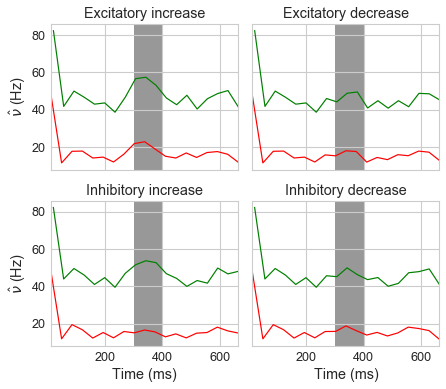

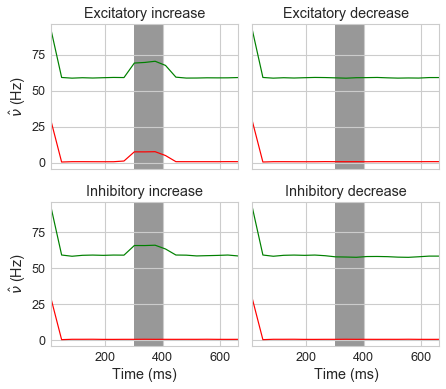

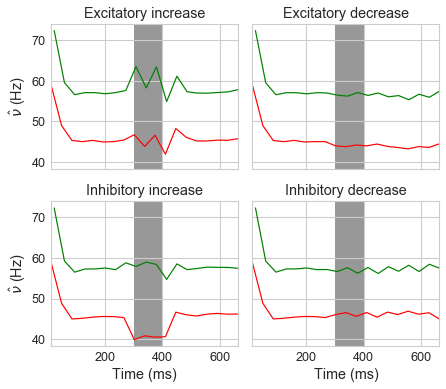

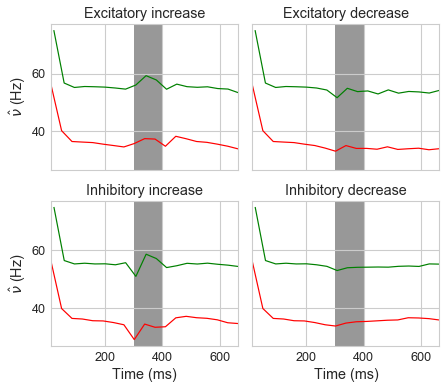

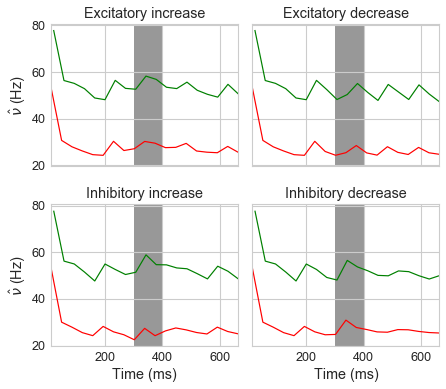

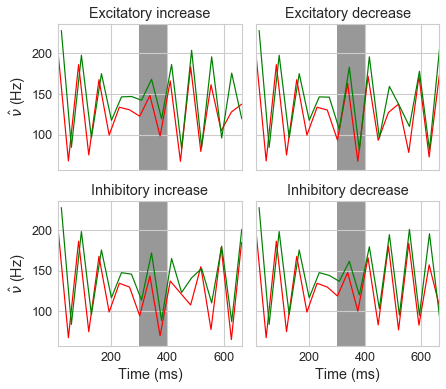

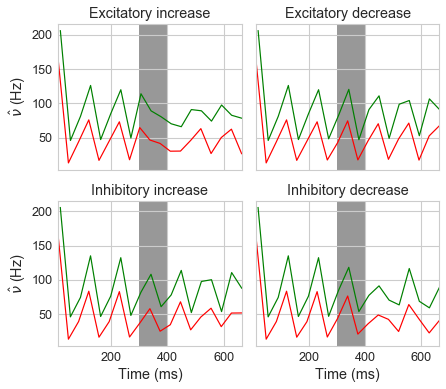

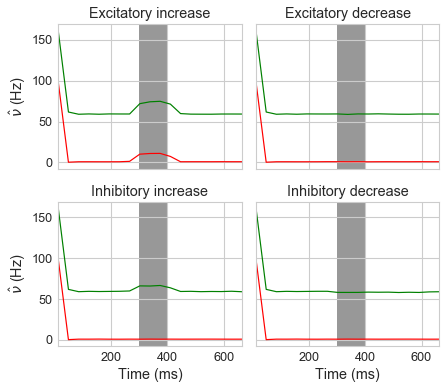

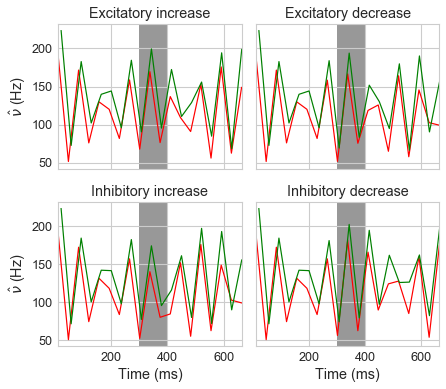

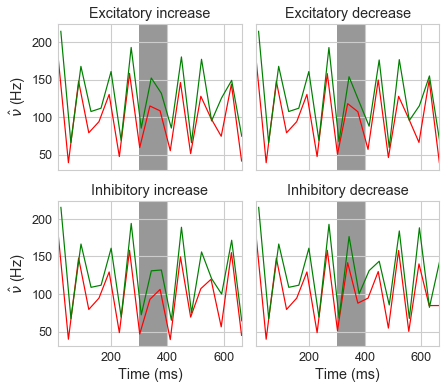

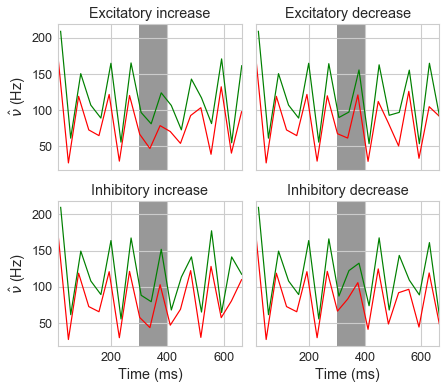

In [13]:
trace_latex_string = ""
path = folders[0]+'/stimulus/'
plt.clf()
fig_dict = {}
for file in files_start_with('exc_', path=path):
    if '-' in file:
        stats = parse_filename(file)
        tmp_file1 = path+file.replace('-','')
        tmp_file2 = path+file
        tmp_file3 = path+file.replace('exc', 'inh').replace('-','')
        tmp_file4 = path+file.replace('exc', 'inh')
        tmp_files = [tmp_file1, tmp_file2, tmp_file3, tmp_file4]
        fig = plotting.trace_plot_all_in_one(tmp_files, title='', 
                                 stim_start=300., 
                                 stim_end=400.)
        save_file_at = path+file.replace('exc_', '').replace('-300000', '')+"df"
        fig.savefig(save_file_at)
        trace_latex_string += figure_template.render(
            figure=save_file_at,
            caption=r"""
            Disturbance Test for $J_{ee} = %d$ and $\nu_{inh,ext} = %d \,\si{Hz}$.
            Excitatory population in green and inhibitory population in red. 
            Grey background is the time of increasing or decreasing stimulation 
            in the center of the network.
            """ % (int(stats[1]), int(stats[2])*100, ),
            width=0.9)

In [14]:
with open('figures.tex', 'w') as f:
    f.write(latex_header)
    f.write(phase_plane_latex_string.replace('{ ','{').replace(' }','}'))
    f.write(r'\clearpage')
    f.write(visu_latex_string.replace('{ ','{').replace(' }','}'))
    f.write(r'\clearpage')
    f.write(raster_autocorr_latex_string.replace('{ ','{').replace(' }','}'))
    f.write(r'\clearpage')
    f.write(trace_latex_string.replace('{ ','{').replace(' }','}'))
    f.write(latex_footer)

['phase_plane_analysis/new_small/periodicity/e0_150_i0_000', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_005', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_010', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_015', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_020', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_025', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_030', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_035', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_040', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_045', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_050', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_055', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_060', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_065', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_070', 'phase_plane_analysis/new_small/periodicity/e0_150_i0_075', 'phase_plane_analysis/new_small/periodi

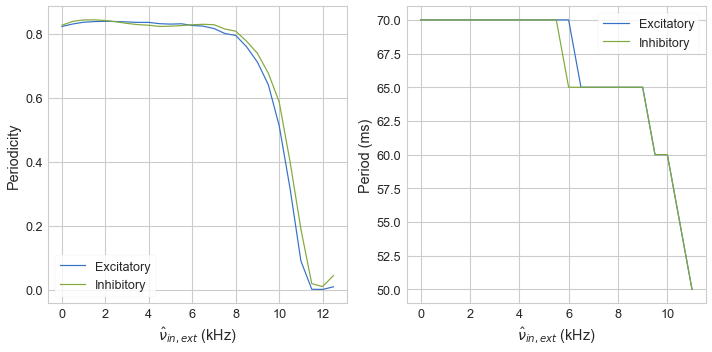

In [155]:
fig = plotting.period_periodicity_plot(folders[0]+'/periodicity/')